# **Generative Adverserial Networks**


Generative adversarial networks (GANs) are algorithmic architectures that use two neural networks, pitting one against the other (thus the “adversarial”) in order to generate new, synthetic instances of data that can pass for real data. They are used widely in image generation, video generation and voice generation.


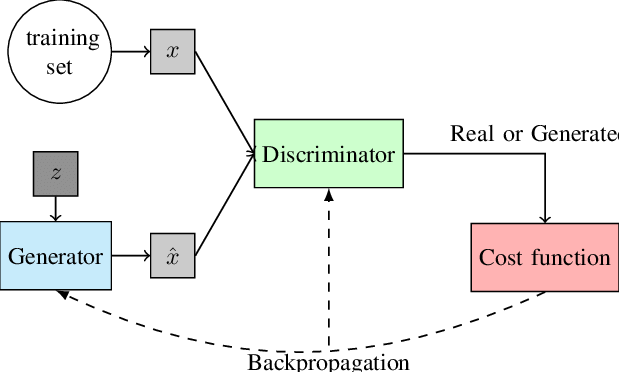



While most deep generative models are trained by maximizing log likelihood or a lower bound on log likelihood, GANs take a radically different approach that does not require inference or explicit calculation of the data likelihood. Instead, two models are used to solve a minimax game: a generator which samples data, and a discriminator which classifies the data as real or generated.In theory these models are capable of modeling an arbitrarily complex probability distribution.








![](http://)

# **Objective**

The objective of this notebook is to introduce beginners to the underlying concept of Generative Adversarial Networks (GANs) in the most intuitive way possible. The aim is to describe the working of such network without delving deep into the complex mathematics associated and in a more practical way such that the viewer can develop his own simple GAN. 

A simple GAN is first constructed here with only hidden dense layers and tries to output meaningful images. The output is analysed discovering one particular issue which is commonplace in simple GANs. The issue is resolved in the next part with one particular type of GAN called Deep Convolution Generative Adversarial Networks (DCGANs) .

# **Introduction**


GANs are made up of two components - 

1. **Generator - generates new data instances**

2. **Discriminator - tries to distinguish the generated or fake data from the real dataset.**

Discriminative algorithms try to classify input data; that is, given the features of an instance of data, they predict a label or category to which that data belongs. So discriminative algorithms map features to labels. They are concerned solely with that correlation.One the other way,loosely speaking,generative algorithms do the opposite. Instead of predicting a label given certain features, they attempt to predict features given a certain label.

While training they both start together from scratch and the generator learn to shape the random distribition through the training epochs.

# **Working Principle**

**Generative** network is fed noise may be in the form a random distribution and generates fake data from the noise. The fake data from the generator is input to the discriminator. Once the training is complete, the generator should be able to generate real like data from the noises.

The interesting fact here is that the generator learns to produce meaningful images without even actually looking at the image.

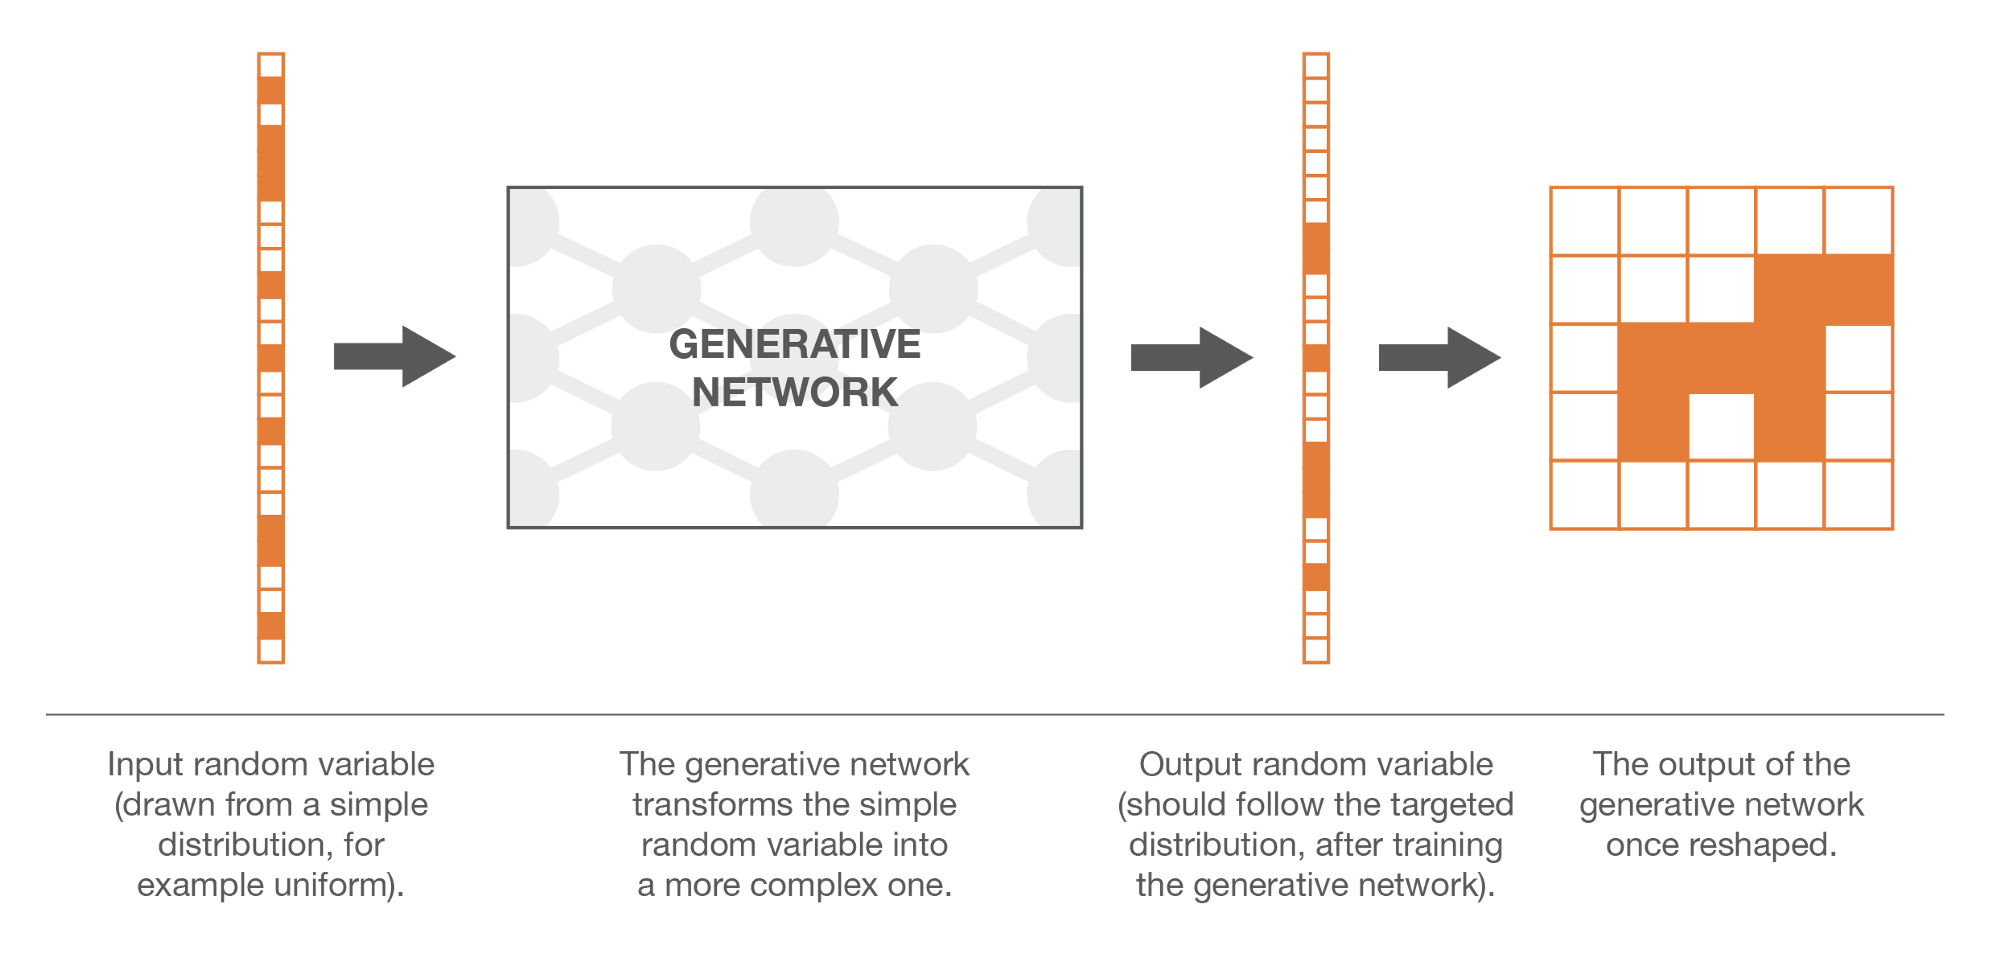

**Discriminator** or the adversarial network works as the opponent to the generator. It is basically a  classifier or discriminator whose function is to distinguish between two different classes of data. Here the classes are real data (labelled as 1) and the fake data the generator produces (labelled as 0).



# **Training the network**

The important thing about training a GAN is that the two components should never be trained together. Rather the network is trained in two different phases,the first phase is for training the discriminator and updating the weights appropriately and in the next step the generator is trained while the discriminator training is disabled.

**Phase 1**
During phase one of training the generator is fed random data(in the form of a distribution) as noise. The generator creates some random images which are given to the discriminator. The discriminator also takes input from dataset of real images. 
The discriminator learns to distinguish the real data from the fake ones by learning or assessing features from it's inputs. The discriminator outputs some probability and difference between the predicted results and the actual results are backpropagated through the network and the weights of the discriminator is updated. 
Remember during this phase, the backpropagation stops at the end of the discriminator and the generator is not trained or updated.


**Phase 2**
In this phase, the generator produced batch of images are directly given as input to the discriminator. The real images are not given this time to the discriminator. The generator learns by tricking the discriminator into it outputting false positives. The discriminator outputs probabilities which are assessed against the actual results and the weights of of the generator are updated through backpropagation.
Remember here during backpropagation, the discriminator weights should not be updated and kept as they were before.

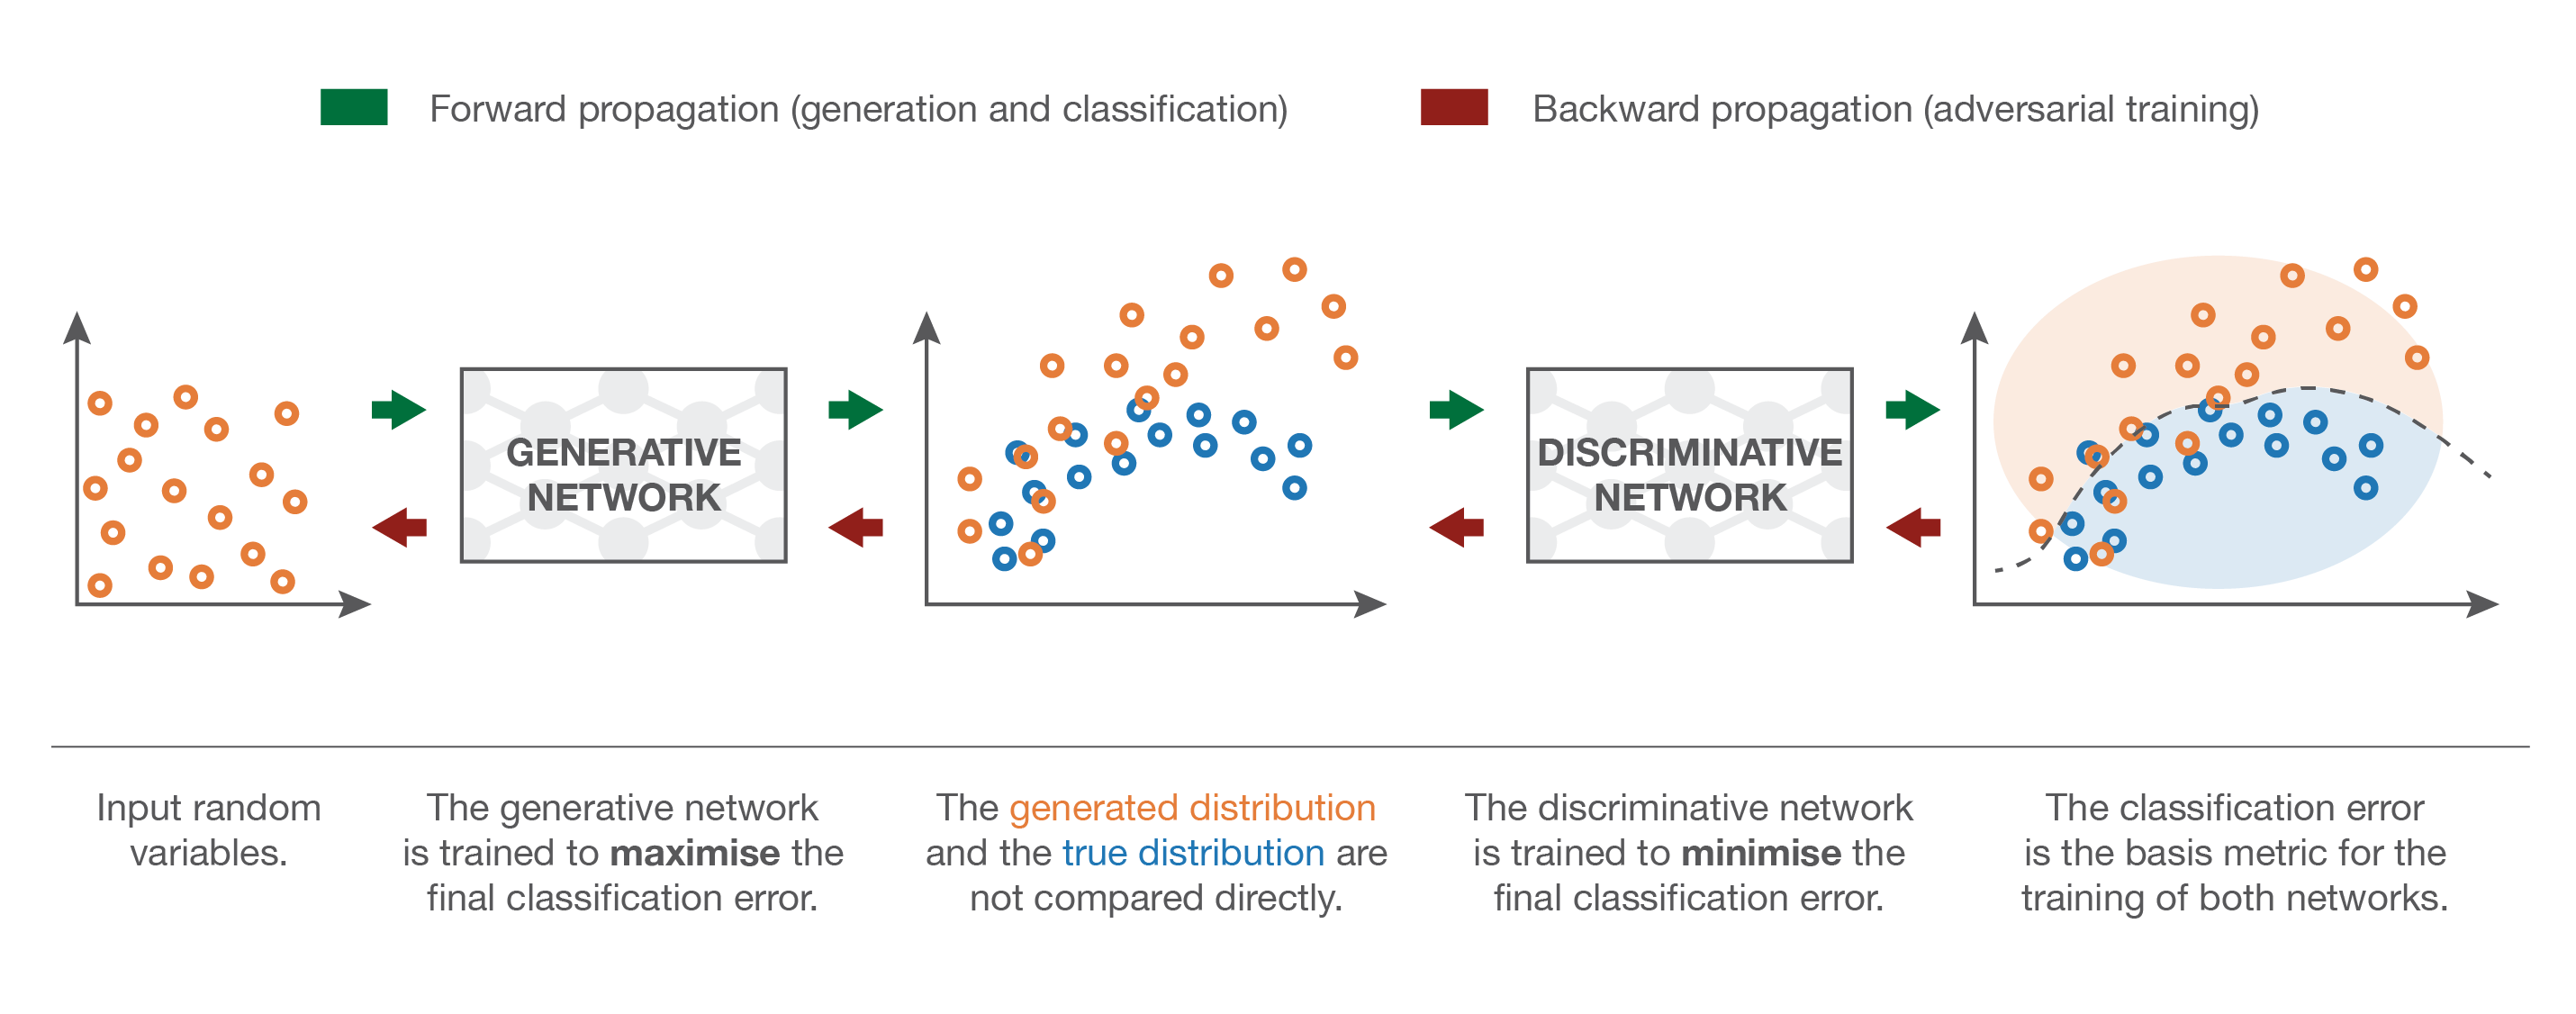

**LOSS FUNCTION of simple GAN**

In the paper that introduced GANs(link below in the reference), the generator tries to minimize the following function while the discriminator tries to maximize it:

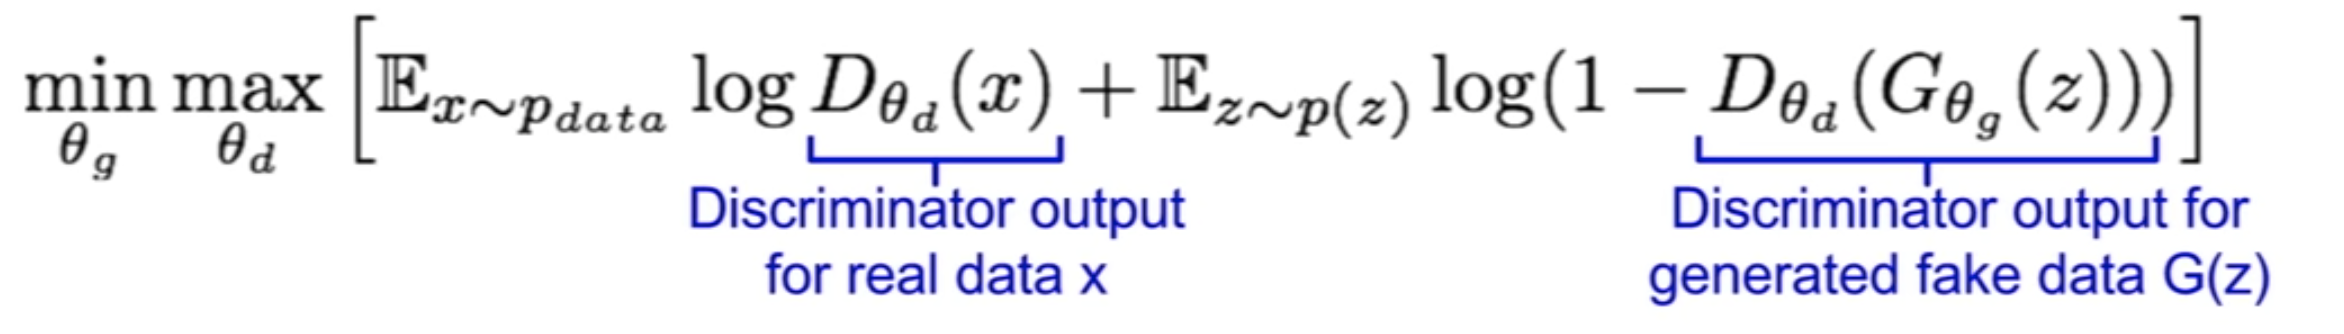
In this function:

* D(x) is the discriminator's estimate of the probability that real data instance x is real.
* Ex is the expected value over all real data instances.
* G(z) is the generator's output when given noise z.
* D(G(z)) is the discriminator's estimate of the probability that a fake instance is real.
* Ez is the expected value over all random inputs to the generator (in effect, the expected value over all generated fake instances G(z)).


The generator can't directly affect the log(D(x)) term in the function, so, for the generator, minimizing the loss is equivalent to minimizing log(1 - D(G(z))).

**Applications of GANs**

* Generate Examples for Image Datasets
* Generate Photographs of Human Faces
* Generate Realistic Photographs
* Image-to-Image Translation
* Text-to-Image Translation
* Semantic-Image-to-Photo Translation
* Photos to Emojis
* Face Aging
* Super Resolution
* 3D Object Generation


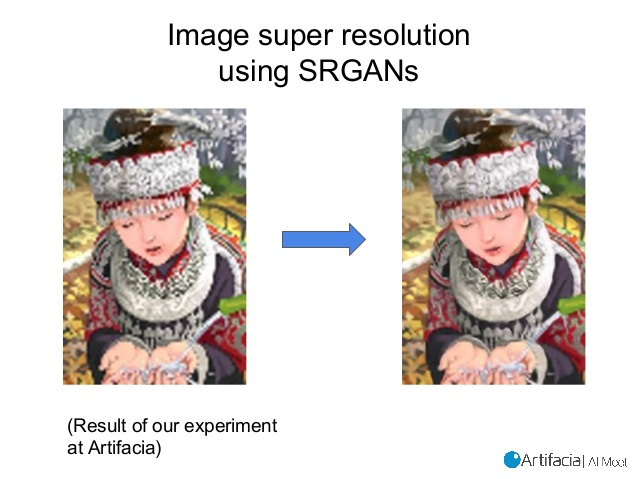

# **Problems with simple GANs**

In practice, however, GANs suffer from many issues, particularly during training. One common
failure mode involves the generator collapsing to produce only a single sample or a small family of
very similar samples. In this case, the generator learns to trick the discriminator with a single image or a few images to believe as real image. Another involves the generator and discriminator oscillating during training,rather than converging to a fixed point. In addition, if one agent becomes much more powerful than the other, the learning signal to the other agent becomes useless, and the system does not learn.
To train GANs many tricks must be employed,one such method is using Deep Convolution Generative Adversarial Networks as discussed in a research paper published in 2016 (link in the references).




# **Let's begin**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**Importing useful packages**

In [ ]:
import matplotlib.pyplot as plt
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf

# **Loading and Preprocessing the data**

In [ ]:
train_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
train_data.head()

dropping the labels from the dataset

In [ ]:
X_train = train_data.drop('label',axis=1)
X_train.head()

In [ ]:
X_train=X_train.values
print(X_train.shape)

In [ ]:
X_train=X_train.reshape(-1,28,28,1)
print(X_train.shape)

# **Data Visualization**

In [ ]:
fig,axe=plt.subplots(2,2)
idx = 0
for i in range(2):
    for j in range(2):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=1

In [ ]:
X_train =  X_train.astype('float32')

The pixel data ranges from 0 to 255 hence dividing each pixel by 255,i.e,normalizing the data such that the range is within 0 to 1.

In [ ]:
X_train = X_train/255
X_train = X_train*2 - 1.

**NOTE**  after normalizing it is multiplied with 2 and substracted from 1 such that it ranges from (-1,1) because in DCGANs the last layer generative model activation is tanh which range is (-1,1) unlike sigmoid ranging (0,1) .

In [ ]:
print(X_train.max(),X_train.min())

# **Simple GAN Model**

**Generative part**

In [ ]:
generator = Sequential()
generator.add(Dense(512,input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784))
generator.add(Reshape([28,28,1]))

In [ ]:
generator.summary()

**Discriminatory part**

In [ ]:
discriminator = Sequential()
discriminator.add(Dense(1,input_shape=[28,28,1]))
discriminator.add(Flatten())
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

In [ ]:
discriminator.summary()

1. Compiling the discriminator layer
2. Compiling the GAN 

NOTE : the generator layer is not compiled seperately because it gets trained as part of the combined model but training the discriminator is necessary because it is trained before the combined model.

In [ ]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [ ]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
GAN.layers

In [ ]:
GAN.summary()

In [ ]:
epochs = 200
batch_size = 64
noise_shape=100

In [ ]:

 for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    
    
    for i in range(X_train.shape[0]//batch_size):
        
        if (i+1)%50 == 0:
            print(f"\tCurrently on batch number {i+1} of {X_train.shape[0]//batch_size}")
            
        noise=np.random.normal(size=[batch_size,noise_shape])
       
        gen_image = generator.predict_on_batch(noise)
        
        train_dataset = X_train[i*batch_size:(i+1)*batch_size]
       
        #training discriminator on real images
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)
        
        #training discriminator on fake images
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)
        
        
        #training generator 
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False
        
        d_g_loss_batch =GAN.train_on_batch(noise, train_label)
        
        
        
       
    #plotting generated images at the start and then after every 10 epoch
    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

        
        
print('Training is complete')

In [ ]:
noise=np.random.normal(size=[10,noise_shape])

gen_image = generator.predict(noise)

noise generated using np.random.normal is given to as input to the generator. In the next step the generator produces batches of meaningful alike image from the random distribution.

In [ ]:
plt.imshow(noise)
plt.title('How the noise looks')

**Generator producing images from noise**

In [ ]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using GANs')
idx=0
for i in range(2):
    for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=1